In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [183]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 30
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.bottom'] = False

In [2]:
f = np.load("../outputs/data/nn_init/k_1_n_50_mlp_depth_1_width_6_online_False.npz")

In [3]:
f = np.load("../outputs/data/nn_init_hard_V/k_1_n_50_mlp_depth_1_width_6_online_False.npz")

In [4]:
tabular_Vs = f["tabular_Vs"]
mlp_Vs = f["mlp_Vs"]
mlp_Vo = f["mlp_Vo"]
condition_numbers = f["condition_numbers"]
bound = f["bound"]
smoothness = f["smoothness"]
seeds = f["seeds"]

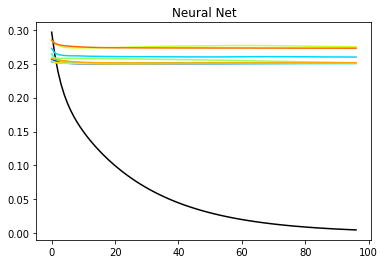

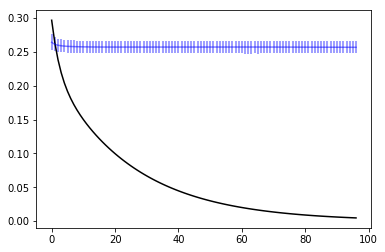

In [5]:
n = seeds.shape[0]

start = 3

plt.plot(tabular_Vs[0, start:], color = 'k', label = "tabular")

colors = plt.cm.jet(np.linspace(0.2,0.8,n))
for i in range(mlp_Vs.shape[0]):
    plt.plot(mlp_Vs[i, start:], color = colors[i], label = "%.2f" % seeds[i])
#plt.legend("seed")
plt.title("Neural Net")
plt.show()

plt.plot(tabular_Vs[0, start:], color = 'k', label = "tabular")

meanV = np.mean(mlp_Vs, axis = 0)[start:]
stdV = np.std(mlp_Vs, axis = 0)[start:]

plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "blue", label= "mlp", alpha = 0.5)

plt.show()

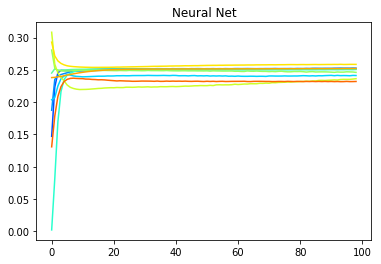

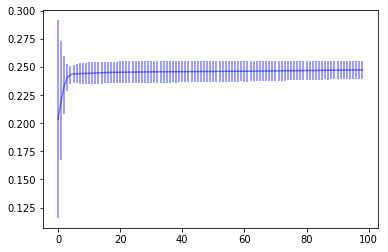

In [6]:
n = seeds.shape[0]

start = 1

colors = plt.cm.jet(np.linspace(0.2,0.8,n))
for i in range(mlp_Vo.shape[0]):
    plt.plot(mlp_Vo[i, start:], color = colors[i], label = "%.2f" % seeds[i])
#plt.legend("seed")
plt.title("Neural Net")
plt.show()

meanV = np.mean(mlp_Vo, axis = 0)[start:]
stdV = np.std(mlp_Vo, axis = 0)[start:]

plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "blue", label= "mlp", alpha = 0.5)

plt.show()

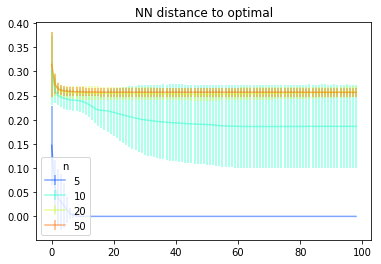

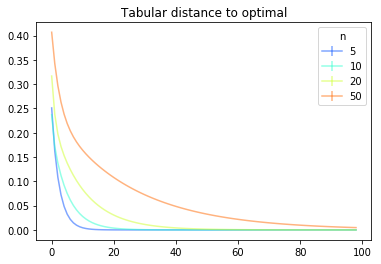

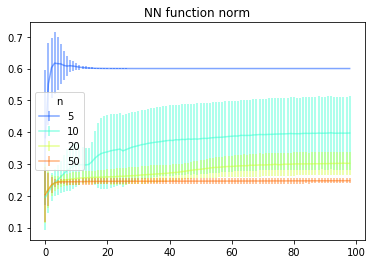

In [7]:
start = 1
ns = [5,10,20,50]
tVs = []
mVs = []
mVo = []
for n in ns:
    f = np.load("../outputs/data/nn_init_hard_V/k_1_n_"+ str(n) + "_mlp_depth_1_width_6_online_False.npz")
    tVs.append(f["tabular_Vs"])
    mVs.append( f["mlp_Vs"])
    mVo.append(f["mlp_Vo"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ns)))
for i,n in enumerate(ns):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = colors[i], label= str(n), alpha = 0.5)
plt.title("NN distance to optimal")
plt.legend(title="n")
plt.show()


colors = plt.cm.jet(np.linspace(0.2,0.8,len(ns)))
for i,n in enumerate(ns):
    meanV = np.mean(tVs[i], axis = 0)[start:]
    stdV = np.std(tVs[i], axis = 0)[start:]

    plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = colors[i], label= str(n), alpha = 0.5)
plt.title("Tabular distance to optimal")
plt.legend(title="n")
plt.show()

colors = plt.cm.jet(np.linspace(0.2,0.8,len(ns)))
for i,n in enumerate(ns):
    meanV = np.mean(mVo[i], axis = 0)[start:]
    stdV = np.std(mVo[i], axis = 0)[start:]

    plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = colors[i], label= str(n), alpha = 0.5)
plt.title("NN function norm")
plt.legend(title="n")
plt.show()



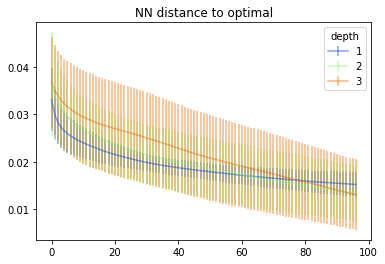

/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:107: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


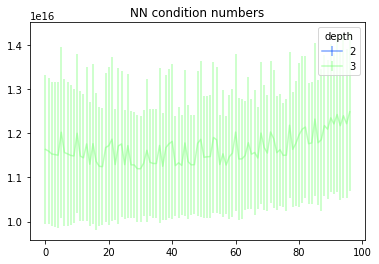

In [8]:
start = 3
ds = [1,2,3]
tVs = []
mVs = []
mVo = []
cnd = []
for d in ds:
    f = np.load("../outputs/data/nn_init/k_1_n_50_mlp_depth_"+str(d)+"_width_6_online_False.npz")
    tVs.append(f["tabular_Vs"])
    mVs.append( f["mlp_Vs"])
    mVo.append(f["mlp_Vo"])
    cnd.append(f["condition_numbers"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ds)))
for i,n in enumerate(ds):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = colors[i], label= str(n), alpha = 0.5)
plt.title("NN distance to optimal")
plt.legend(title="depth")
plt.show()


colors = plt.cm.jet(np.linspace(0.2,0.8,len(ds)))
for i,n in enumerate(ds[1:]):
    meanV = np.mean(cnd[i], axis = 0)[start:]
    stdV = np.std(cnd[i], axis = 0)[start:]

    plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = colors[i], label= str(n), alpha = 0.5)
plt.title("NN condition numbers")
plt.legend(title="depth")
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

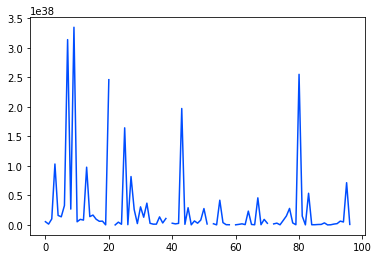

In [9]:
start = 3

colors = plt.cm.jet(np.linspace(0.2,0.8,n))
for i in range(mlp_Vs.shape[0]):
    plt.plot(condition_numbers[i, start:], color = colors[i], label = "%.2f" % seeds[i])
plt.show()

meanc = np.mean(condition_numbers, axis = 0)[start:]
stdc = np.std(condition_numbers, axis = 0)[start:]

plt.errorbar(range(meanc.shape[0]), meanc, yerr = stdc, color = "blue", label= "mlp", alpha = 0.5)

plt.show()

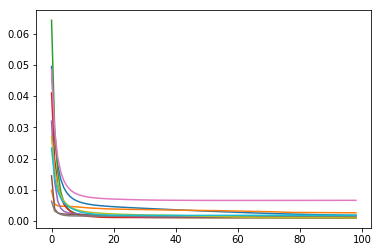

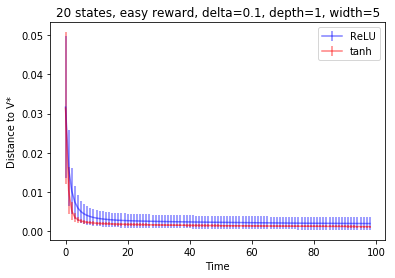

In [157]:
f = np.load("../outputs/data/homog_exp/hard_Falsek_1_n_20_mlp_depth_1_width_5_online_False.npz")

tanh_mlp_Vs = f["tanh_mlp_Vs"]
tanh_mlp_Vo = f["tanh_mlp_Vo"]
mlp_Vs = f["mlp_Vs"]
mlp_Vo = f["mlp_Vo"]
bound = f["bound"]
smoothness = f["smoothness"]
#cond = f["condition_numbers"]

for i in range(mlp_Vs.shape[0]):
    plt.plot(mlp_Vs[i, start:], label = "%.2f" % seeds[i])
plt.show()

start = 1

meanV = np.mean(mlp_Vs, axis = 0)[start:]
stdV = np.std(mlp_Vs, axis = 0)[start:]

plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "blue", label= "ReLU", alpha = 0.5)


meanV = np.mean(tanh_mlp_Vs, axis = 0)[start:]
stdV = np.std(tanh_mlp_Vs, axis = 0)[start:]

plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "red", label= "tanh", alpha = 0.5)

plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.title("20 states, easy reward, delta=0.1, depth=1, width=5")
plt.legend()
plt.show()



# meanV = np.mean(mlp_Vo, axis = 0)[start:]
# stdV = np.std(mlp_Vo, axis = 0)[start:]

# plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "blue", label= "ReLU", alpha = 0.5)


# meanV = np.mean(tanh_mlp_Vo, axis = 0)[start:]
# stdV = np.std(tanh_mlp_Vo, axis = 0)[start:]

# plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "red", label= "tanh", alpha = 0.5)

# plt.legend()
# plt.show()

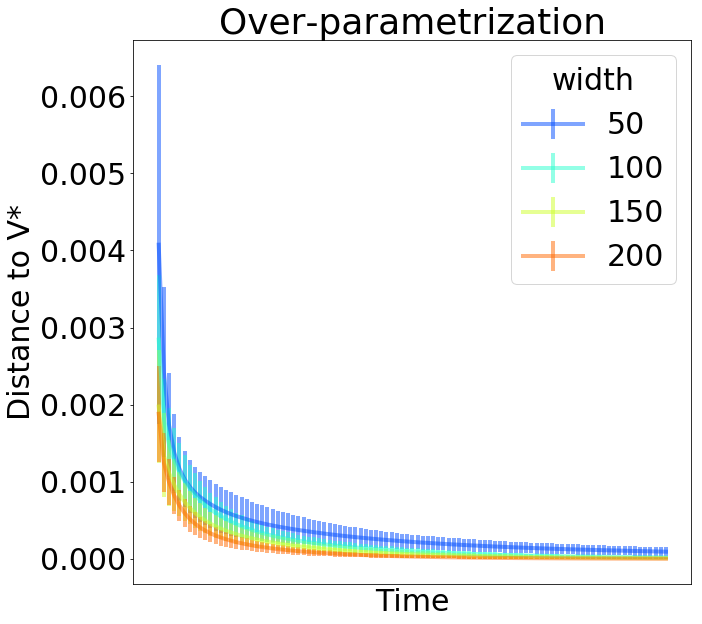

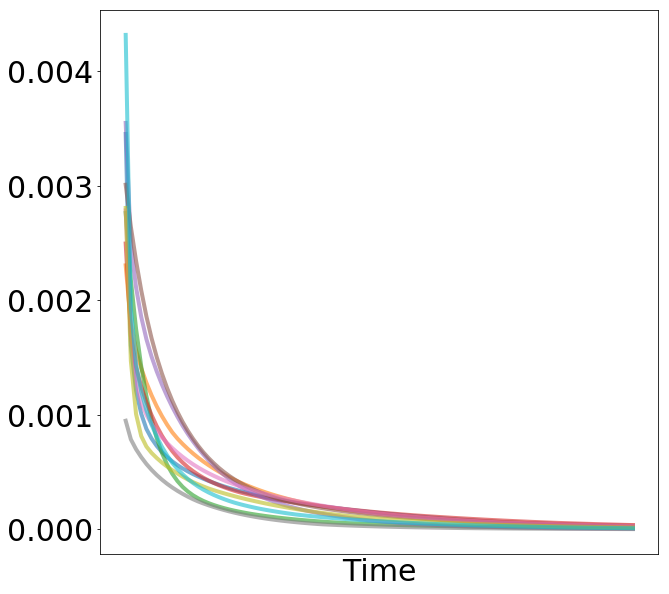

In [274]:
start=1
ws = [50, 100, 150, 200]#[3,5,10]#
mVs = []
mVo = []
for w in ws:
    f = np.load("../outputs/data/homog_exp/hard_False_k_1_n_20_mlp_depth_1_width_"+ str(w) + "_online_False.npz")
    mVs.append( f["mlp_Vs"])
    mVo.append(f["mlp_Vo"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
for i,w in enumerate(ws):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
plt.title("Over-parametrization")
plt.legend(title="width")
plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.show()

index = 1
for j in range(mVs[0].shape[0]):
    plt.plot(mVs[index][j, start:], alpha = 0.6)

plt.xlabel("Time")
plt.show()

No handles with labels found to put in legend.


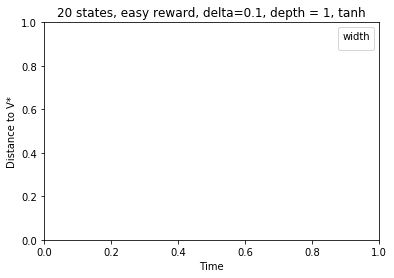

In [164]:
start=1
ws = [5] #, 40, 50, 100]
mVs = []
mVo = []
for w in ws:
    f = np.load("../outputs/data/homog_exp/k_1_n_20_mlp_depth_1_width_"+ str(w) + "_online_False.npz")
    mVs.append( f["tanh_mlp_Vs"])
    mVo.append(f["tanh_mlp_Vo"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
for i,w in enumerate(ws):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    #plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)

plt.show()

plt.title("20 states, easy reward, delta=0.1, depth = 1, tanh")
plt.legend(title="width")
plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.show()

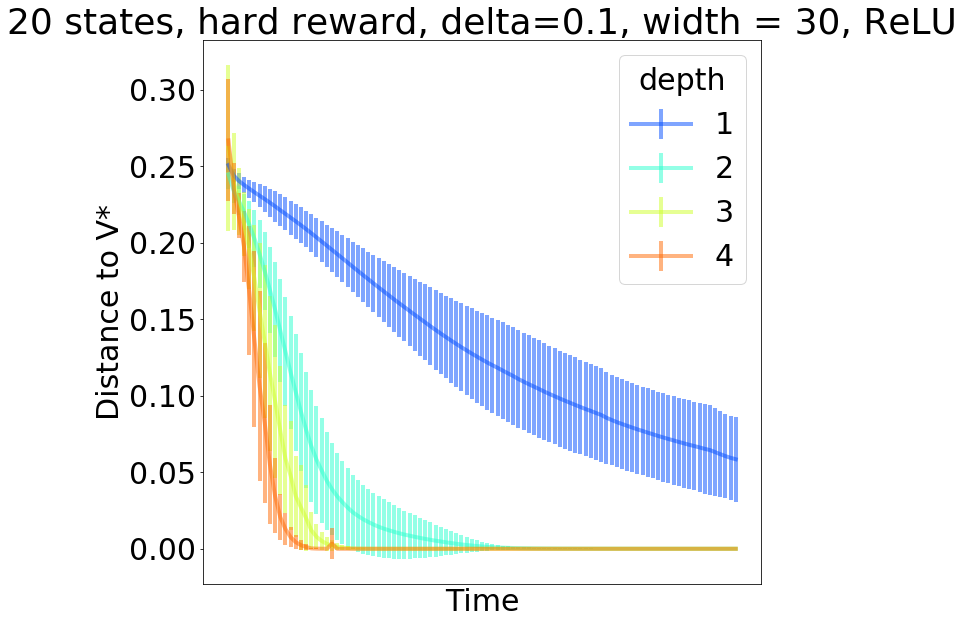

In [231]:
start=1
ws = [1,2,3,4] #, 40, 50, 100]
mVs = []
mVo = []
for w in ws:
    f = np.load("../outputs/data/homog_exp/k_1_n_20_mlp_depth_"+str(w)+"_width_30_online_False.npz")
    mVs.append( f["mlp_Vs"])
    mVo.append(f["mlp_Vo"])

colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
for i,w in enumerate(ws):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
plt.title("20 states, hard reward, delta=0.1, width = 30, ReLU")
plt.legend(title="depth")
plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.show()

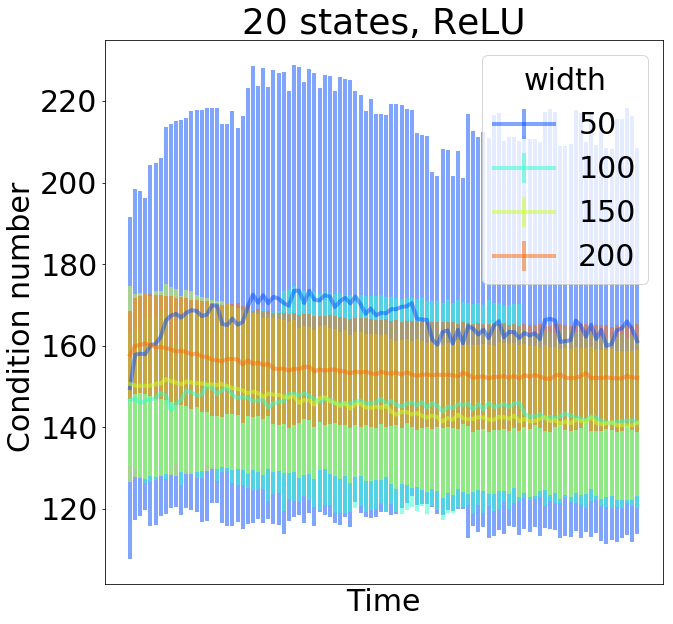

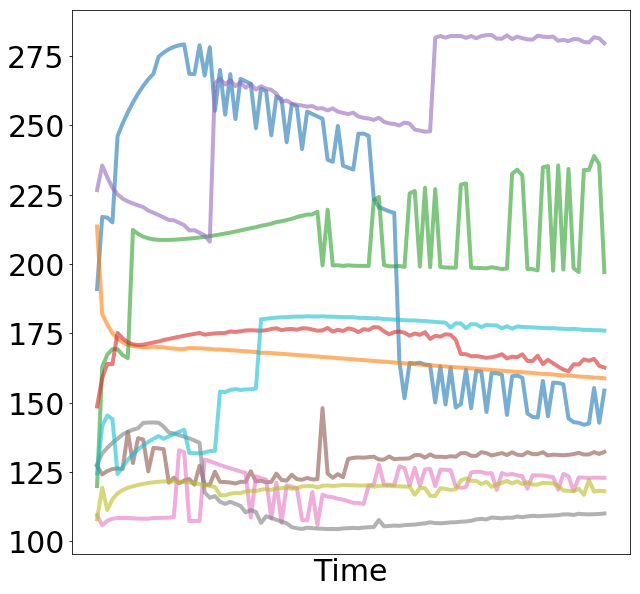

In [280]:
start = 0
ws = [50, 100, 150, 200] 
c = []
for w in ws:
    f = np.load("../outputs/data/homog_exp/hard_false_k_1_n_20_mlp_depth_1_width_"+ str(w) + "_online_False.npz")
    c.append( f["condition_numbers"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
for i,w in enumerate(ws):
    meanV = np.mean(c[i], axis = 0)[start:]
    stdV = np.std(c[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
plt.title("20 states, ReLU")
plt.legend(title="width")
plt.ylabel("Condition number ")
plt.xlabel("Time")
plt.show()

index = 0
for j in range(c[0].shape[0]):
    plt.plot(c[index][j, start:], alpha = 0.6)

plt.xlabel("Time")
plt.show()

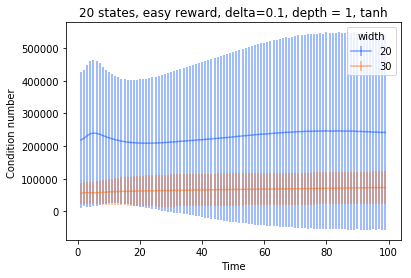

In [98]:

start=1
ws = [20, 30] #40, 50, 100, 150]
c = []
for w in ws:
    f = np.load("../outputs/data/homog_exp/hard_Falsek_1_n_20_mlp_depth_1_width_"+ str(w) + "_online_False.npz")
    c.append( f["tanh_condition_numbers"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
for i,w in enumerate(ws):
    meanV = np.mean(c[i], axis = 0)[start:]
    stdV = np.std(c[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
plt.title("20 states, easy reward, delta=0.1, depth = 1, tanh")
plt.legend(title="width")
plt.ylabel("Condition number ")
plt.xlabel("Time")
plt.show()

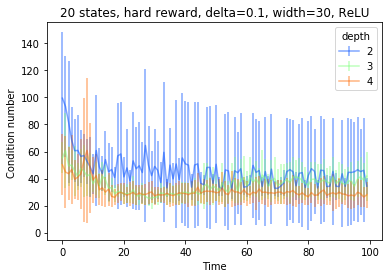

In [136]:
start=0
ds = [2, 3, 4]
c = []
for d in ds:
    f = np.load("../outputs/data/homog_exp/k_1_n_20_mlp_depth_"+str(d)+"_width_30_online_False.npz")
    c.append( f["condition_numbers"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ds)))
for i,w in enumerate(ds):
    meanV = np.mean(c[i], axis = 0)[start:]
    stdV = np.std(c[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
plt.title("20 states, hard reward, delta=0.1, width=30, ReLU")
plt.legend(title="depth")
plt.ylabel("Condition number ")
plt.xlabel("Time")
plt.show()

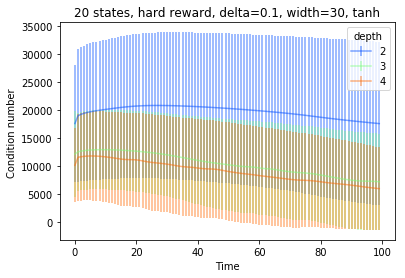

In [137]:
start=0
ds = [2, 3, 4]
c = []
for d in ds:
    f = np.load("../outputs/data/homog_exp/k_1_n_20_mlp_depth_"+str(d)+"_width_30_online_False.npz")
    c.append( f["tanh_condition_numbers"])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ds)))
for i,w in enumerate(ds):
    meanV = np.mean(c[i], axis = 0)[start:]
    stdV = np.std(c[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
plt.title("20 states, hard reward, delta=0.1, width=30, tanh")
plt.legend(title="depth")
plt.ylabel("Condition number ")
plt.xlabel("Time")
plt.show()

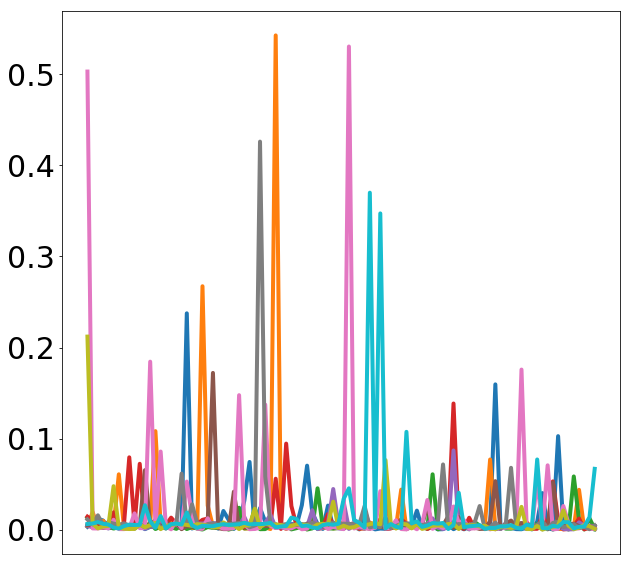

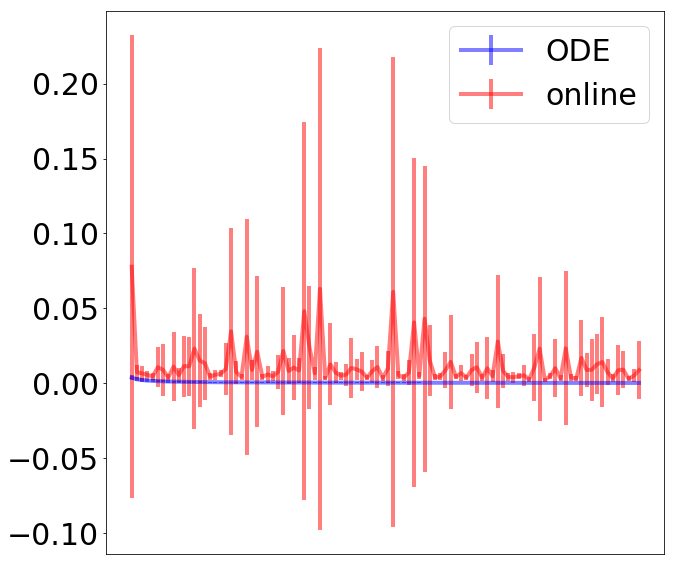

In [232]:
f = np.load("../outputs/data/ode_v_online/k_1_n_20_mlp_depth_1_width_20.npz")

online_mlp_Vs = f["online_mlp_Vs"]
#tanh_mlp_Vo = f["tanh_mlp_Vo"]
mlp_Vs = f["mlp_Vs"]
#mlp_Vo = f["mlp_Vo"]
#bound = f["bound"]
#smoothness = f["smoothness"]
#cond = f["condition_numbers"]

start = 2

for i in range(10):
    plt.plot(online_mlp_Vs[i, start:])
plt.show()

meanV = np.mean(mlp_Vs, axis = 0)[start:]
stdV = np.std(mlp_Vs, axis = 0)[start:]

plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "blue", label= "ODE", alpha = 0.5)


meanV = np.mean(online_mlp_Vs, axis = 0)[start:]
stdV = np.std(online_mlp_Vs, axis = 0)[start:]

plt.errorbar(range(meanV.shape[0]), meanV, yerr = stdV, color = "red", label= "online", alpha = 0.5)

plt.legend()
plt.show()


/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


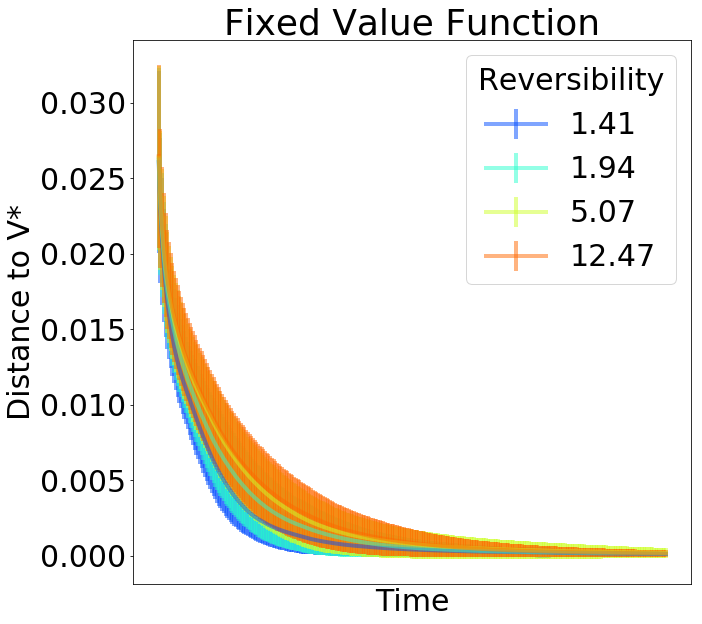

/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


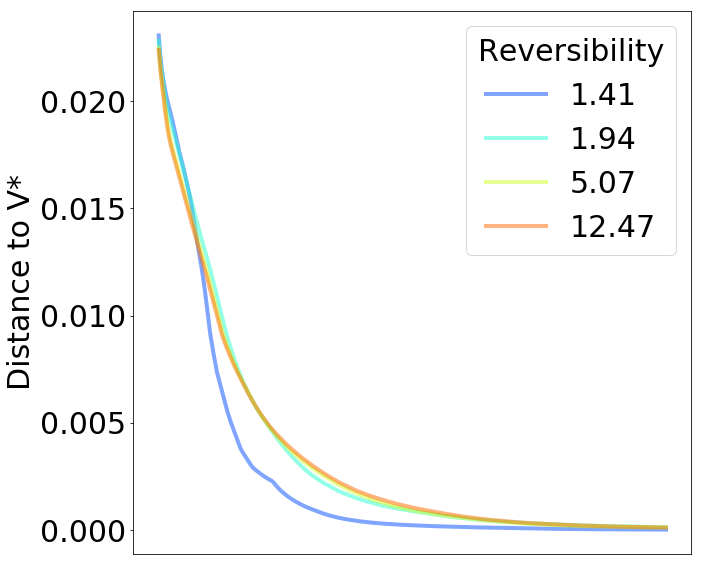

/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


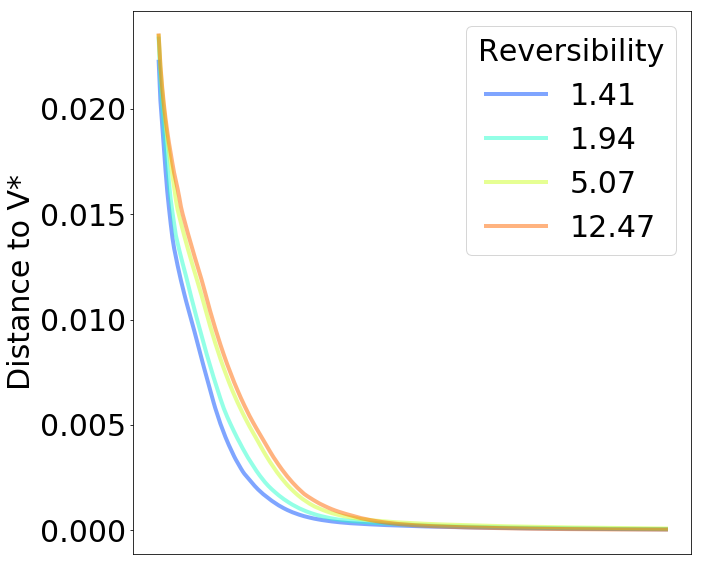

In [242]:
start=3
deltas = [0.5, 0.4, 0.3, 0.27] # ,40, 50, 100]
mVs = []
tVs = []
lVs = []
b = []
for d in deltas:
    f = np.load("../outputs/data/sr/fixed_hard_False_k_1_n_20_mlp_depth_1_width_20_delta_"+str(d)+"_online_False.npz")
    mVs.append( f["mlp_Vs"])
    tVs.append( f["tabular_Vs"])
    lVs.append( f["linear_Vs"])
    b.append( f["bound"][0])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(deltas)))
for i,d in enumerate(deltas):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]
    
    for j in range(mVs[i].shape[0]):
        if mVs[i][j,-1] > 0.1:
            print(d, j)

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= "%.2f"%b[i], alpha = 0.5)
    
plt.title("Fixed Value Function")
plt.legend(title="Reversibility")
plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.show()

seed = 25
for i,d in enumerate(deltas):

    plt.plot(mVs[i][seed, start:], color = colors[i], label= "%.2f"%b[i], alpha = 0.5)

plt.legend(title="Reversibility")
plt.ylabel("Distance to V*")
plt.show()

seed = 1
for i,d in enumerate(deltas):

    plt.plot(mVs[i][seed, start:], color = colors[i], label= "%.2f"%b[i], alpha = 0.5)

plt.legend(title="Reversibility")
plt.ylabel("Distance to V*")
plt.show()

/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


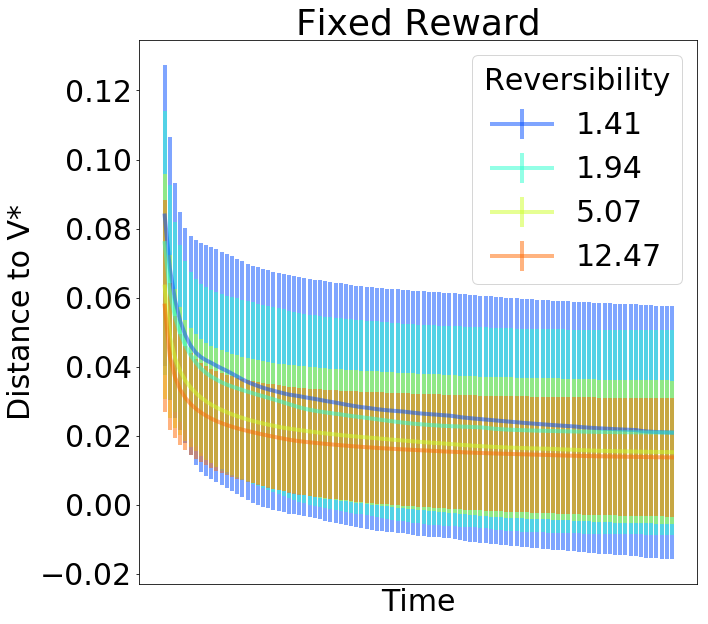

/Users/davidbrandfonbrener/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


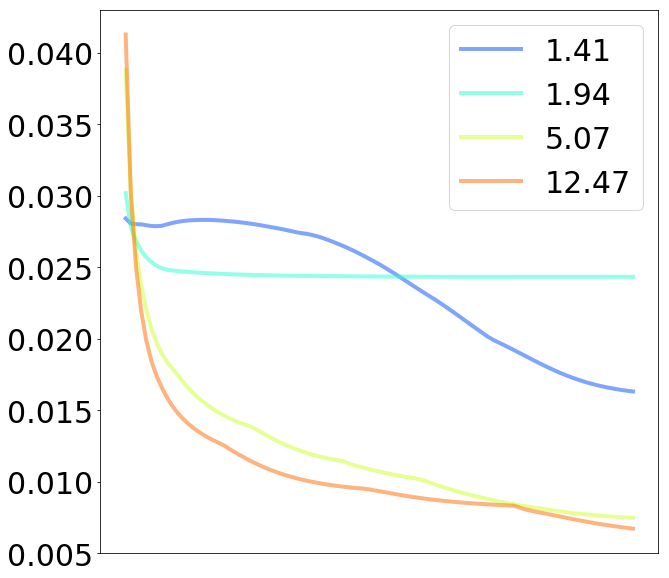

In [223]:
start=1
deltas = [0.5, 0.4, 0.3, 0.27] # ,40, 50, 100]
mVs = []
tVs = []
lVs = []
b = []
for d in deltas:
    f = np.load("../outputs/data/sr/hard_False_k_1_n_20_mlp_depth_1_width_5_delta_"+str(d)+"_online_False.npz")
    mVs.append( f["mlp_Vs"])
    tVs.append( f["tabular_Vs"])
    lVs.append( f["linear_Vs"])
    b.append( f["bound"][0])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(deltas)))
for i,d in enumerate(deltas):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= "%.2f"%b[i], alpha = 0.5)
    
plt.title("Fixed Reward")
plt.legend(title="Reversibility")
plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.show()

seed = 4
for i,d in enumerate(deltas):

    plt.plot(mVs[i][seed, start:], color = colors[i], label= "%.2f"%b[i], alpha = 0.5)

plt.legend()
plt.show()

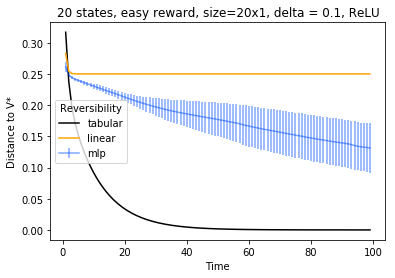

In [131]:
start=1
deltas = [0.4]
mVs = []
tVs = []
lVs = []
b = []
for d in deltas:
    f = np.load("../outputs/data/sr/hard_True_k_1_n_20_mlp_depth_1_width_20_delta_"+str(d)+"_online_False.npz")
    mVs.append( f["mlp_Vs"])
    tVs.append( f["tabular_Vs"])
    lVs.append( f["linear_Vs"])
    b.append( f["bound"][0])
    
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
for i,d in enumerate(deltas):
    meanV = np.mean(mVs[i], axis = 0)[start:]
    stdV = np.std(mVs[i], axis = 0)[start:]

    plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= "mlp", alpha = 0.5)
    
    plt.plot(range(start, meanV.shape[0]+start), tVs[i][0,start:], color='k', label="tabular")
    plt.plot(range(start, meanV.shape[0]+start), lVs[i][0,start:], color = 'orange', label = "linear")
plt.title("20 states, easy reward, size=20x1, delta = 0.1, ReLU")
plt.legend(title="Reversibility")
plt.ylabel("Distance to V*")
plt.xlabel("Time")
plt.show()